<a href="https://colab.research.google.com/github/DanyaFire/StatPrac/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В проекте рассматривается Movies Dataset TMDB (Top Rated).

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Python_KDA/top_rated_movies(tmdb).csv')
df.head()

,id,title,overview,release_date,popularity,vote_average,vote_count
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,5.522,8.708,27883
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,5.317,8.689,21151
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,4.747,8.570,12771
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,4.457,8.567,16219
4,1356039,Counterattack,When a hostage rescue mission creates a new en...,2025-02-27,9.430,8.524,431


Анализ отсутствующих строк:

In [ ]:
df.isna().sum()

,0
id,0
title,0
overview,0
release_date,2
popularity,0
vote_average,0
vote_count,0


Заметим, что в столбце "Дата релиза" имеются некорректные данные.
Выполним обработку данных.

In [ ]:
# Преобразуем столбец в datetime, некорректные значения преобразуем в NaT (Not a Time)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Заполняем NaT самой ранней датой
earliest_date = df['release_date'].min()
df['release_date'] = df['release_date'].fillna(earliest_date)

# Преобразуем обратно в строку
df['release_date'] = df['release_date'].dt.strftime('%Y-%m-%d')

# Проверка, что NaN'ов больше нет
print("\nПропущенные значения после обработки:")
print(df.isnull().sum())


Пропущенные значения после обработки:
id              0
title           0
overview        0
release_date    0
popularity      0
vote_average    0
vote_count      0
dtype: int64


Построим гистограмму распределения рейтинга.

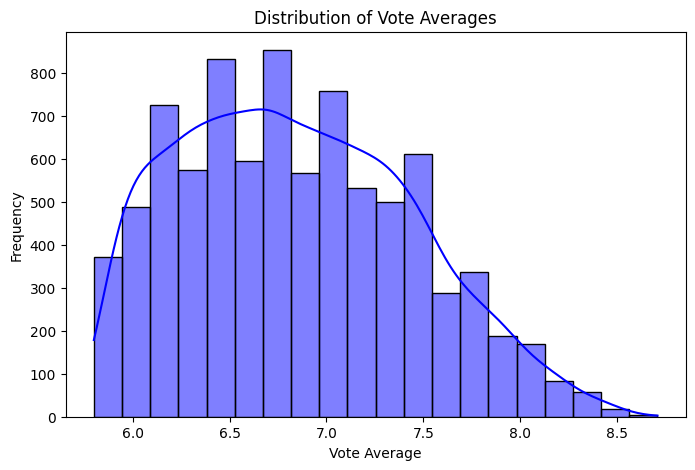

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['vote_average'], bins=20, kde=True, color='blue')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Averages')
plt.show()

Построим гистограмму распределения популярности.

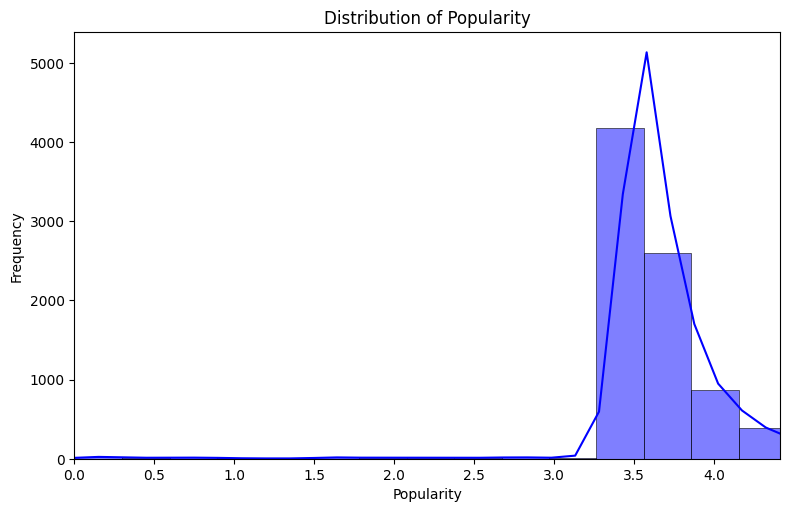

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=100, kde=True, color='blue')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.xlim(0,df['popularity'].quantile(0.95))
plt.tight_layout()
plt.title('Distribution of Popularity')
plt.show()

Посмотрим, какие фильмы из набора данных находятся на первых 10-ти местах по популярности.

<ipython-input-24-ed3b30b83001>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_movies['title'], x = top_movies['popularity'], palette='Reds_r')


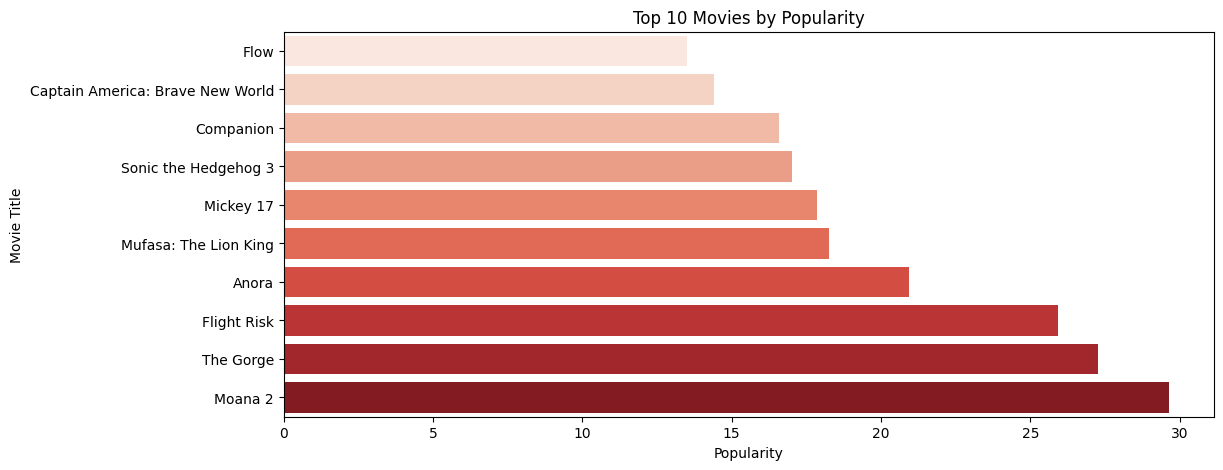

In [ ]:
top_movies = df.nlargest(10, 'popularity')
plt.figure(figsize=(12, 5))
sns.barplot(y = top_movies['title'], x = top_movies['popularity'], palette='Reds_r')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Popularity')
plt.gca().invert_yaxis()
plt.show()

Посмотрим, какие фильмы из набора данных находятся на первых 10-ти местах по рейтингу.

<ipython-input-60-9c20ee89f3eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rated_movies['title'], x=top_rated_movies['vote_average'], palette='Oranges_r')


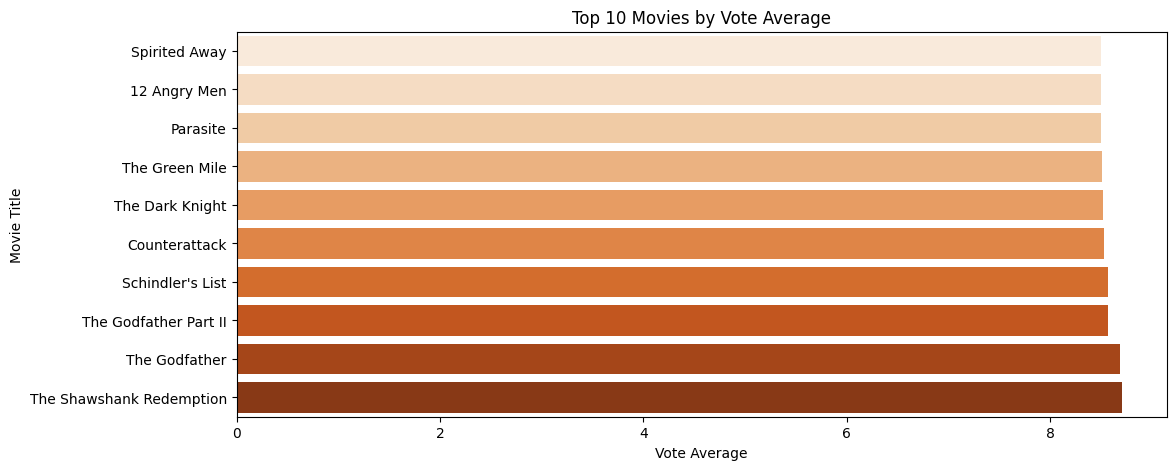

In [ ]:
top_rated_movies = df.nlargest(10, 'vote_average')
plt.figure(figsize=(12, 5))
sns.barplot(y=top_rated_movies['title'], x=top_rated_movies['vote_average'], palette='Oranges_r')
plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Vote Average')
plt.gca().invert_yaxis()
plt.show()

Теперь посмотрим, как связаны между собой популярность и рейтинг:

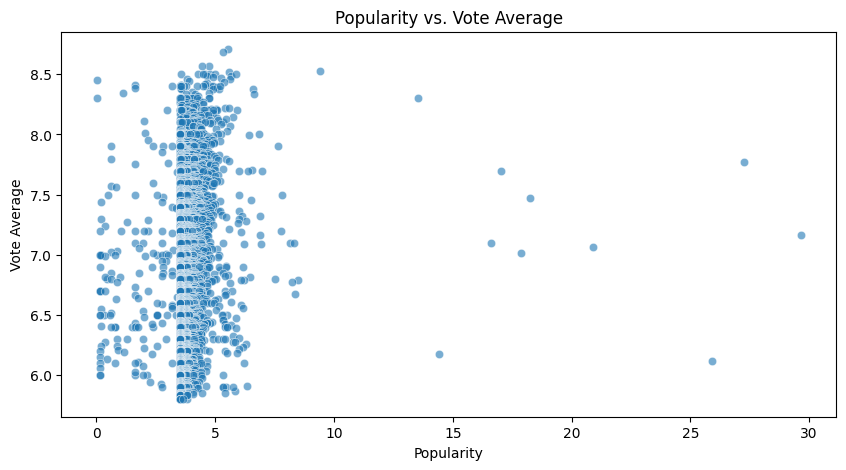

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['popularity'], y=df['vote_average'], alpha=0.6)
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.title('Popularity vs. Vote Average')
plt.show()

Интересно узнать, сколько фильмов в каждый год из списка выходило. Выведем график зависимости количества фильмов от года.

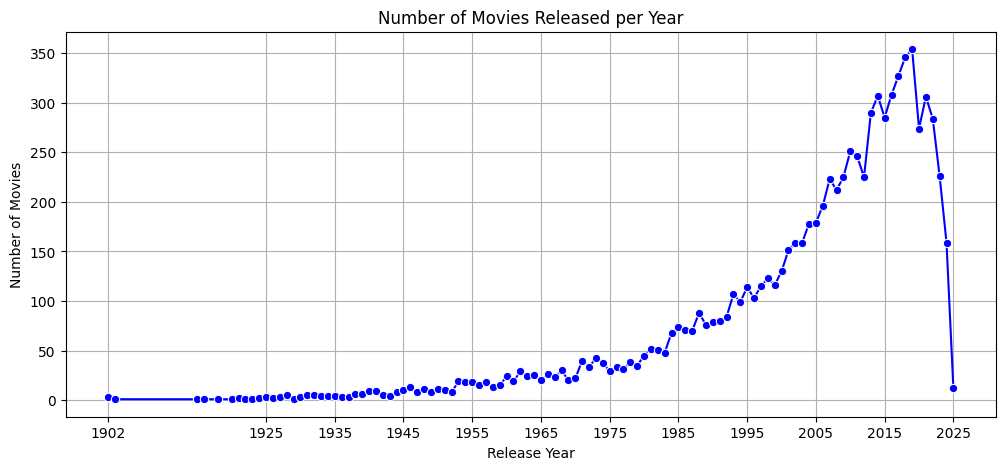

In [ ]:
year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='blue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year')
plt.xticks(year_counts.index[::10])
plt.grid(True)
plt.show()

Построим корреляционную матрицу

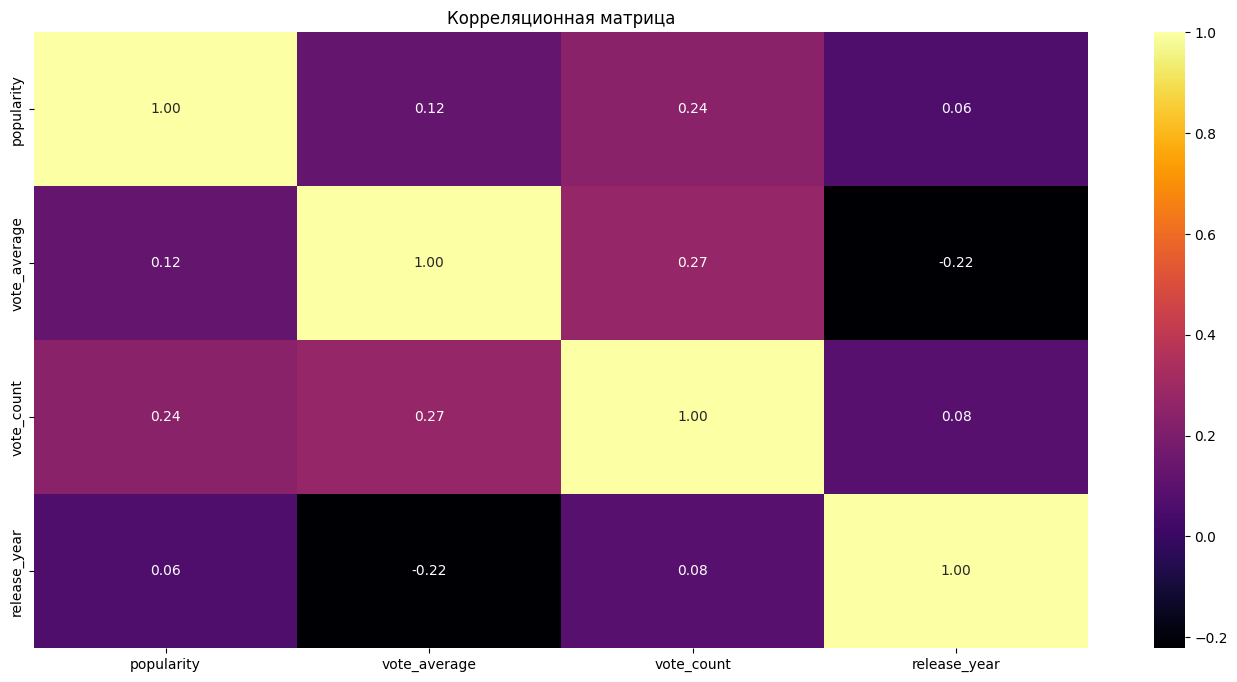

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['release_year'] = df['release_date'].str[:4]

# Преобразуйте в числовой тип (int), если это возможно
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Числовые признаки, которые мы будем анализировать
numeric_features = ['popularity', 'vote_average', 'vote_count', 'release_year']

# Корреляционная матрица
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(17, 8)) # Немного уменьшил размер, чтобы лучше помещалась на экран
sns.heatmap(corr_matrix, annot=True, cmap="inferno", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()